# Assignment 4

**NAME:**Weizhuo Xiong

**I D :**914443957

In this assignment, you'll combine the assignment 3 data set with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list). The CSV file `fresh.csv` contains the fresh fruits and vegetables data you extracted in assignment 3.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it would be a good idea to use [caching][requests_cache].

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any Data.gov API. You may need the key again later in the quarter, so make sure you save it.

These modules may be useful:

* [requests](http://docs.python-requests.org/en/master/user/quickstart/)
* [requests_cache][]
* [urlparse](https://docs.python.org/2/library/urlparse.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/)

[requests_cache]: https://pypi.python.org/pypi/requests-cache

In [59]:
#import keys and required module
key = 'xStFnySLz87sqbUcPUGH3CSgG0CuEl2rHcZjWpr2'
import requests_cache
from urllib2 import Request, urlopen
import pandas as pd
import numpy as np
import json
import requests
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

__Exercise 1.1.__ Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` should return this list:

```python
[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]
```

As usual, make sure you document and test your function.

In [2]:
def ndb_search(term):
    #set url
    url='https://api.nal.usda.gov/ndb/search'
    #cache each requests to prevent from block
    requests_cache.install_cache("cache")
    #set default params and required params
    response = requests.get(url, params = {
        "format":'JSON',
        "q": term,
        "sort":'r',
        "max":50,
        "offset":0,
        "api_key":key
    })
    response = response.json()
    return response['list']['item']
ndb_search("quail eggs")

[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]

__Exercise 1.2.__ Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* You can convert the output of `ndb_search()` to a data frame with `pd.DataFrame()`.
* The string methods for [Python](https://docs.python.org/2/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/text.html#method-summary) are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

**Strategy:** Firstly I use homework3 to export original data into csv and use this file to read. Then I tried to append string <STRONG><FONT style="color:red">'raw'</FONT></STRONG> to each fruit and vegetable, and split vegetable string if it has <STRONG><FONT style="color:red">'_'</FONT></STRONG>, both of which will remove a lot of noise. Mostly, the right answer locate in group <STRONG><FONT style="color:red">Fruits and Fruit Juices </FONT></STRONG> and group <STRONG><FONT style="color:red">Vegetable and Vegetable Products</FONT></STRONG>. I will use the first filted item's NDB as my answer if it's vegetables. However, for fruit, beside checking whether it's in required group, I will tell fruit from juice too. There are two exceptions, for <STRONG><FONT style="color:red">kiwi</FONT></STRONG> in fruit family, it dosen't in target group, so I find it seperately by adding string <STRONG><FONT style="color:red">'sprout'</FONT></STRONG>, and for vegetable avocado, I use fruit group to locate it.

In [40]:
#import data from fresh.csv, previously I use my own data file, so I change the canvas version a little 
#bit to make it behave similar , and easy to operate latter too
fresh = pd.read_csv('fresh.csv')
fresh = fresh[['type','food','form','price_per_lb','yield','lb_per_cup','price_per_cup']]
fresh.iloc[26,1]='cucumber_peeled'
fresh.iloc[36,1]='green_cabbage'
fresh.iloc[37,1]='red_cabbage'
fresh

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,fruit,watermelon,Fresh1,0.333412,0.520000,0.330693,0.212033
1,fruit,cantaloupe,Fresh1,0.535874,0.510000,0.374786,0.393800
2,fruit,tangerines,Fresh1,1.377962,0.740000,0.407855,0.759471
3,fruit,strawberries,Fresh1,2.358808,0.940000,0.319670,0.802171
4,fruit,plums,Fresh1,1.827416,0.940000,0.363763,0.707176
5,fruit,oranges,Fresh1,1.035173,0.730000,0.407855,0.578357
6,fruit,raspberries,Fresh1,6.975811,0.960000,0.319670,2.322874
7,fruit,pomegranate,Fresh1,2.173590,0.560000,0.341717,1.326342
8,fruit,pineapple,Fresh1,0.627662,0.510000,0.363763,0.447686
9,fruit,apricots,Fresh1,3.040072,0.930000,0.363763,1.189102


In [41]:
NDB=[]
#loop on each row in fresh
for i in range(len(fresh.iloc[:,1])):
    #if it's a fruit( not kiwi), append string ' raw' into term
    if fresh.iloc[i,0]=='fruit':
        if fresh.iloc[i,1] not in 'kiwi':
            term = fresh.iloc[i,1]+ ' raw'
            #use ndb_search() function and term to find wanted data
            data=pd.DataFrame(ndb_search(term))
            #find the first eligible one in filted data and append it into NDB list 
            for j in range(len(data.iloc[:,1])):
                if ('Fruits and Fruit Juices' in data.iloc[j,1]) & ('Juices' not in data.iloc[j,2]):
                    NDB.append(data.iloc[j,3])
                    break        
        else:
            #if it's kiwi, append 'sprout' into term and do the same thing
            term = fresh.iloc[i,1]+ ' ,sprout'
            data=pd.DataFrame(ndb_search(term))
            NDB.append(data.iloc[j,3])
    #if it's a vegetable   
    else:
        #split vegetable string if it has _, then append string 'raw'
        if '_' in fresh.iloc[i,1]:
            a,b = fresh.iloc[i,1].split('_')
            term = a +' '+ b +' raw'
        else:
            term = fresh.iloc[i,1] + ' raw'
        #use ndb_search() function and term to find wanted data
        data=pd.DataFrame(ndb_search(term))
        #find the first eligible one in filted data and append it into NDB list 
        for j in range(len(data.iloc[:,1])):
            if ('Vegetables and Vegetable Products' in data.iloc[j,1])|('Fruits and Fruit Juices' in data.iloc[j,1]):
                NDB.append(data.iloc[j,3])
                break
fresh['NDB']=NDB
fresh

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup,NDB
0,fruit,watermelon,Fresh1,0.333412,0.520000,0.330693,0.212033,09326
1,fruit,cantaloupe,Fresh1,0.535874,0.510000,0.374786,0.393800,09181
2,fruit,tangerines,Fresh1,1.377962,0.740000,0.407855,0.759471,09221
3,fruit,strawberries,Fresh1,2.358808,0.940000,0.319670,0.802171,09316
4,fruit,plums,Fresh1,1.827416,0.940000,0.363763,0.707176,09279
5,fruit,oranges,Fresh1,1.035173,0.730000,0.407855,0.578357,09201
6,fruit,raspberries,Fresh1,6.975811,0.960000,0.319670,2.322874,09302
7,fruit,pomegranate,Fresh1,2.173590,0.560000,0.341717,1.326342,09286
8,fruit,pineapple,Fresh1,0.627662,0.510000,0.363763,0.447686,09266
9,fruit,apricots,Fresh1,3.040072,0.930000,0.363763,1.189102,09021


__Exercise 1.3.__ Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'143.93'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'57.57'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'131.72'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'87.23'}
```

Be sure to document and test your function.

In [42]:
def ndb_report(NDB):
    #set url
    url='https://api.nal.usda.gov/ndb/V2/reports'
    #cache each requests to prevent from block
    requests_cache.install_cache("cache")
    #set default params and required params
    response = requests.get(url, params = {
        "ndbno": NDB,
        "type":"b",
        "format":'json',
        "api_key":key
    })
    response = response.json()
    #return the location of wanted calory data
    return response['foods'][0]['food']['nutrients']
#[i['name'] for i in ndb_report('09279')]
ndb_report('09279')[0]

{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'143.93'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'57.57'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'131.72'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'87.23'}

__Exercise 1.4.__ Which foods provide the best combination of price, yield, and nutrition? You can use kilocalories as a measure of "nutrition" here, but more a detailed analysis is better. Use plots to support your analysis.

**Answer:**Firstly, I combine the food energy(kcal) value of each food into fresh Dataframe, then I draw the scatter plot of food yield price value which shows that <strong style="color:#B0B">rapsberry</strong> have the best yield price value, then I draw the scatter plot of nutrient for each food which show that <strong style="color:#B0B">avocados</strong> is the most nutritious food and the distribution of these two plot have much difference. So I decided to use unit yield price nutrient which uses nutrition of each food divided by unit yield price. Then I draw the scatter plot again, and the answer shows that <strong style="color:#B0B">banana</strong> provide the best combination of price, yield and energy, which is 245.26kcal per yield price. <strong style="color:#B0B"> Green cabbage</strong> provide the best combination of price, yield and protein, which is 5,79g per yield price.Also,<strong style="color:#B0B"> Green cabbage</strong> provide the best combination of price, yield and average mineral content, which is 110.60mg per yield price. Finally,<strong style="color:#B0B"> pineapple</strong> provide the best combination of price, yield and vitamin C content, which is 149.32mg per yield price.

In [43]:
#convert all energy into same unit(kcal) and operate on kiwi seperately
def energy_cal(i):
    if ndb_report(i)[1]['unit']=='kcal' and len(i)==5:
        return float(ndb_report(i)[1]['value'])
    elif ndb_report(i)[1]['unit']=='kJ' and len(i)==5:
        return float(ndb_report(i)[1]['value'])/4.184
    else:
        return float(ndb_report(i)[0]['value'])
fresh['energy'] = [energy_cal(i) for i in fresh.iloc[:,7]]
fresh.head()

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup,NDB,energy
0,fruit,watermelon,Fresh1,0.333412,0.52,0.330693,0.212033,09326,30.0
1,fruit,cantaloupe,Fresh1,0.535874,0.51,0.374786,0.393800,09181,34.0
2,fruit,tangerines,Fresh1,1.377962,0.74,0.407855,0.759471,09221,43.0
3,fruit,strawberries,Fresh1,2.358808,0.94,0.319670,0.802171,09316,32.0
4,fruit,plums,Fresh1,1.827416,0.94,0.363763,0.707176,09279,46.0


In [57]:
#input different nutrition into dataframe
fresh['protein'] = [float(j['value']) for i in fresh.iloc[:,7] for j in ndb_report(i) if j['name']=='Protein']
fresh['mineral_Ca'] = [float(j['value']) for i in fresh.iloc[:,7] for j in ndb_report(i) if j['name']=='Calcium, Ca']
fresh['mineral_Fe'] = [float(j['value']) for i in fresh.iloc[:,7] for j in ndb_report(i) if j['name']=='Iron, Fe']
fresh['mineral_Mg'] = [float(j['value']) for i in fresh.iloc[:,7] for j in ndb_report(i) if j['name']=='Magnesium, Mg']
fresh['vitamin_C'] = [float(j['value']) for i in fresh.iloc[:,7] for j in ndb_report(i) if j['name']=='Vitamin C, total ascorbic acid']
fresh.head()

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup,NDB,energy,protein,mineral_Ca,mineral_Fe,mineral_Mg,vitamin_C
0,fruit,watermelon,Fresh1,0.333412,0.52,0.330693,0.212033,09326,30.0,0.61,7.0,0.24,10.0,8.1
1,fruit,cantaloupe,Fresh1,0.535874,0.51,0.374786,0.393800,09181,34.0,0.84,9.0,0.21,12.0,36.7
2,fruit,tangerines,Fresh1,1.377962,0.74,0.407855,0.759471,09221,43.0,0.50,18.0,0.20,8.0,31.0
3,fruit,strawberries,Fresh1,2.358808,0.94,0.319670,0.802171,09316,32.0,0.67,16.0,0.41,13.0,58.8
4,fruit,plums,Fresh1,1.827416,0.94,0.363763,0.707176,09279,46.0,0.70,6.0,0.17,7.0,9.5


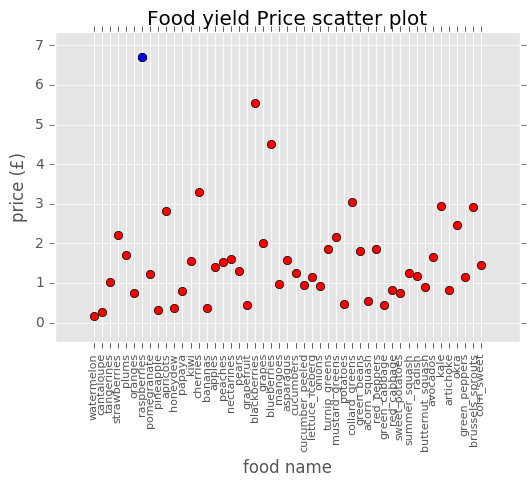

In [45]:
x = range(49)
y = fresh['price_per_lb']*fresh['yield']
labels = fresh.iloc[:,1]
plt.plot(x, y, 'ro')
plt.plot(6, (fresh['price_per_lb']*fresh['yield'])[6], 'bo')
plt.xticks(x*2, labels, rotation='vertical',fontsize=8)
plt.title('Food yield Price scatter plot')
plt.xlabel('food name')
plt.ylabel('price ' +'('+ unichr(163) +')')
plt.margins(0.1)
plt.show()

Most Nutrition(energy) Food: 42    avocados
Name: food, dtype: object nutrition value is  167.0


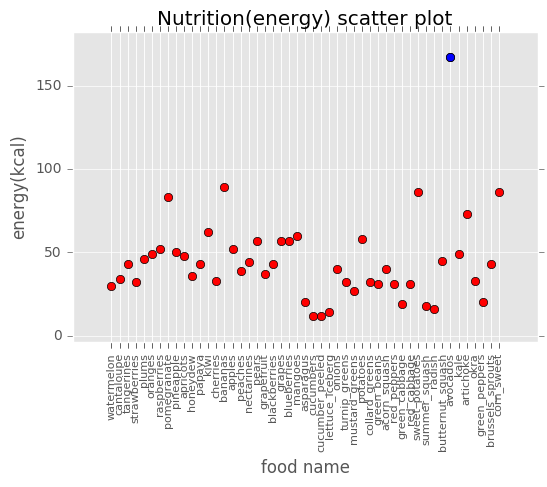

In [89]:
print 'Most Nutrition(energy) Food:', fresh[fresh['energy'] == max(fresh['energy'])]['food'], 'nutrition value is ',fresh['energy'][42]
x = range(49)
y = fresh['energy']
labels = fresh.iloc[:,1]
plt.plot(x, y, 'ro')
plt.plot(42, fresh['energy'][42], 'bo')
plt.xticks(x*2, labels, rotation='vertical',fontsize=8)
plt.title('Nutrition(energy) scatter plot')
plt.xlabel('food name')
plt.ylabel('energy(kcal)')
plt.margins(0.1)
plt.show()

Most Nutrition(energy) Food: 14    bananas
Name: food, dtype: object nutrition(energy) value is  245.267315473


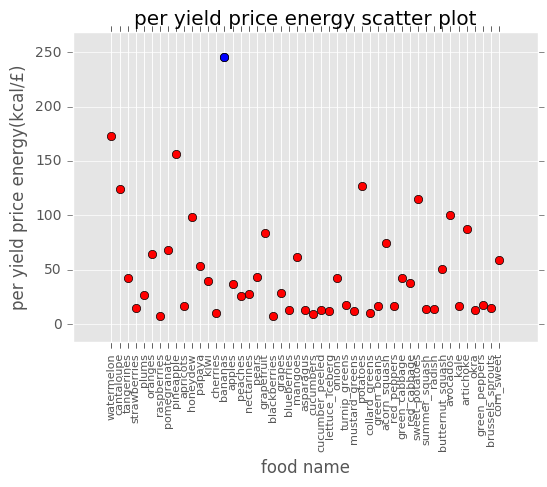

In [88]:
print 'Most Nutrition(energy) Food:', fresh[fresh['energy']/(fresh['price_per_lb']*fresh['yield']) == max(fresh['energy']/(fresh['price_per_lb']*fresh['yield']))]['food'], 'nutrition(energy) value is ',(fresh['energy']/(fresh['price_per_lb']*fresh['yield']))[14]
x = range(49)
y = fresh['energy']/(fresh['price_per_lb']*fresh['yield'])
labels = fresh.iloc[:,1]
plt.plot(x, y, 'ro')
plt.plot(14,(fresh['energy']/(fresh['price_per_lb']*fresh['yield']))[14], 'bo')
plt.xticks(x*2, labels, rotation='vertical',fontsize=8)
plt.title('per yield price energy scatter plot')
plt.xlabel('food name')
plt.ylabel('per yield price energy(kcal/' + unichr(163) +')')
plt.margins(0.1)
plt.show()

Most Nutrition(protein) Food: 36    green_cabbage
Name: food, dtype: object nutrition(protein) value is  5.76387016982


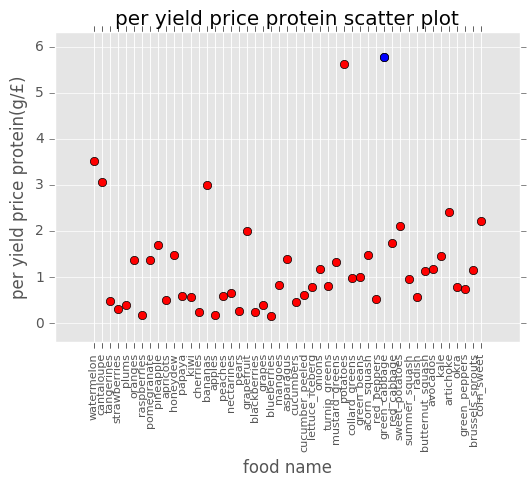

In [87]:
print 'Most Nutrition(protein) Food:', fresh[fresh['protein']/(fresh['price_per_lb']*fresh['yield']) == max(fresh['protein']/(fresh['price_per_lb']*fresh['yield']))]['food'], 'nutrition(protein) value is ',(fresh['protein']/(fresh['price_per_lb']*fresh['yield']))[36]
x = range(49)
y = fresh['protein']/(fresh['price_per_lb']*fresh['yield'])
labels = fresh.iloc[:,1]
plt.plot(x, y, 'ro')
plt.plot(36,(fresh['protein']/(fresh['price_per_lb']*fresh['yield']))[36], 'bo')
plt.xticks(x*2, labels, rotation='vertical',fontsize=8)
plt.title('per yield price protein scatter plot')
plt.xlabel('food name')
plt.ylabel('per yield price protein(g/' + unichr(163) +')')
plt.margins(0.1)
plt.show()

Most Nutrition(energy) Food: 36    green_cabbage
Name: food, dtype: object nutrition(energy) value is  110.599801066


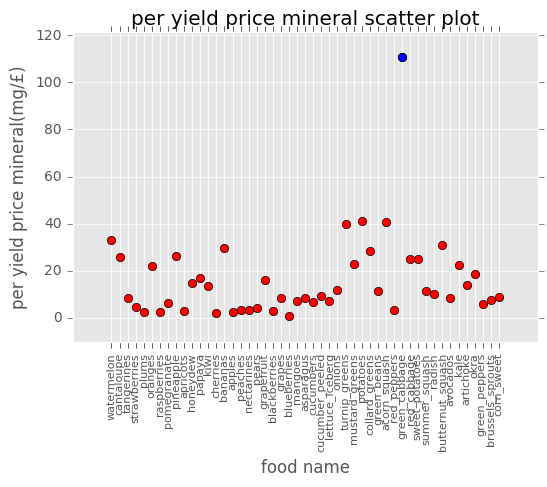

In [86]:
print 'Most Nutrition(energy) Food:', fresh[np.mean(fresh.iloc[:,10:13],axis=1)/(fresh['price_per_lb']*fresh['yield']) == max(np.mean(fresh.iloc[:,10:13],axis=1)/(fresh['price_per_lb']*fresh['yield']))]['food'], 'nutrition(energy) value is ',(np.mean(fresh.iloc[:,10:13],axis=1)/(fresh['price_per_lb']*fresh['yield']))[36]
x = range(49)
y = np.mean(fresh.iloc[:,10:13],axis=1)/(fresh['price_per_lb']*fresh['yield'])
labels = fresh.iloc[:,1]
plt.plot(x, y, 'ro')
plt.plot(36,(np.mean(fresh.iloc[:,10:13],axis=1)/(fresh['price_per_lb']*fresh['yield']))[36], 'bo')
plt.xticks(x*2, labels, rotation='vertical',fontsize=8)
plt.title('per yield price mineral scatter plot')
plt.xlabel('food name')
plt.ylabel('per yield price mineral(mg/' + unichr(163) +')')
plt.margins(0.1)
plt.show()

Most Nutrition(vatimin C) Food: 8    pineapple
Name: food, dtype: object nutrition(protein) value is  149.324793072


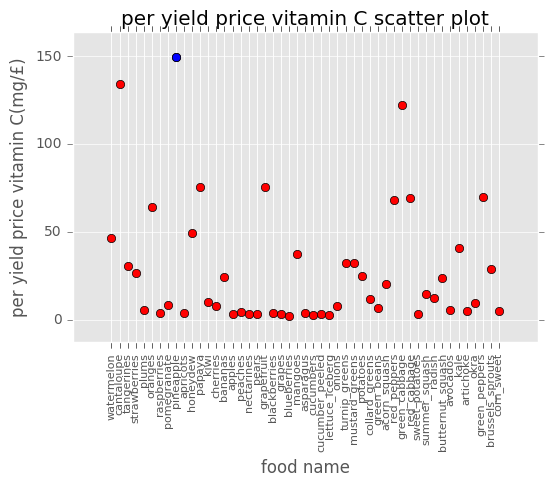

In [92]:
print 'Most Nutrition(vatimin C) Food:', fresh[fresh['vitamin_C']/(fresh['price_per_lb']*fresh['yield']) == max(fresh['vitamin_C']/(fresh['price_per_lb']*fresh['yield']))]['food'], 'nutrition(protein) value is ',(fresh['vitamin_C']/(fresh['price_per_lb']*fresh['yield']))[8]
x = range(49)
y = fresh['vitamin_C']/(fresh['price_per_lb']*fresh['yield'])
labels = fresh.iloc[:,1]
plt.plot(x, y, 'ro')
plt.plot(8,(fresh['vitamin_C']/(fresh['price_per_lb']*fresh['yield']))[8], 'bo')
plt.xticks(x*2, labels, rotation='vertical',fontsize=8)
plt.title('per yield price vitamin C scatter plot')
plt.xlabel('food name')
plt.ylabel('per yield price vitamin C(mg/' + unichr(163) +')')
plt.margins(0.1)
plt.show()